In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/brady/git/MolecularNodes/docs':
  os.chdir(r'/Users/brady/git/MolecularNodes/docs')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/importlib/_bootstrap.py": 1646301454.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/importlib/_bootstrap_external.py": 1646301454.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/codecs.py": 1646301451.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/encodings/aliases.py": 1646301453.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/encodings/__init__.py": 1646301453.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/encodings/utf_8.py": 1646301453.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/abc.py": 1646301451.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/io.py": 1646301451.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/stat.py": 1646301451.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/lib/python3.10/_collections_abc.py": 1646301451.0, "/opt/homebrew/Caskroom/miniconda/base/envs/mn/li

/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/ipykernel_13789/809095269.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
#| label: setup
#| code-fold: true
import molecularnodes as mn
import bpy
import sys
import tempfile
import os
from IPython.display import display, Image

mn.register()

def clear_scene():
    bpy.ops.object.select_all(action="DESELECT")
    bpy.ops.object.select_by_type(type="MESH")
    bpy.ops.object.delete()
    for node in bpy.data.node_groups:
        if node.type == "GEOMETRY":
            bpy.data.node_groups.remove(node)

def orient_camera(object):
    object.select_set(True)
    bpy.ops.view3d.camera_to_view_selected()

def render_image(engine = 'eevee', x = 1000, y = 500):
    # setup render engine
    if engine == "eevee":
        bpy.context.scene.render.engine = "BLENDER_EEVEE"
    elif engine == "cycles":
        
        bpy.context.scene.render.engine = "CYCLES"
        try:
            bpy.context.scene.cycles.device = "GPU"
        except:
            print("GPU Rendering not available")

    # Render
    with tempfile.TemporaryDirectory() as temp:

        path = os.path.join(temp, "test.png")
        bpy.context.scene.render.resolution_x = x
        bpy.context.scene.render.resolution_y = y
        bpy.context.scene.render.image_settings.file_format = "PNG"
        bpy.context.scene.render.filepath = path
        bpy.ops.render.render(write_still=True)
        display(Image(filename=path))

no zipfile


In [3]:
#| label: setup-scene
#| code-fold: true

# load template scene with nice HDRI lighting
bpy.ops.wm.read_homefile(app_template = "MolecularNodes")

# change the background to a custom color
try:
    world_nodes = bpy.data.worlds['World Shader'].node_tree.nodes
    world_nodes['MN_world_shader'].inputs['BG Color'].default_value = mn.color.random_rgb()
except KeyError:
    print("Oh no, didn't set up the base scene.")

Finsihed opening molecule after 0.19645000000000046 seconds
Adding object to scene.
Added res_id after 4.399999999993298e-05 s
Added res_name after 0.00045300000000025875 s
Added atomic_number after 0.0005510000000006343 s
Added b_factor after 1.7999999999851468e-05 s
Added vdw_radii after 0.0005730000000001567 s
Added chain_id after 0.00010099999999990672 s
Added entity_id after 4.399999999993298e-05 s
Added atom_name after 0.00033500000000064034 s
Added lipophobicity after 0.0005610000000002557 s
Added charge after 0.0005750000000004363 s
Added is_backbone after 9.300000000056485e-05 s
Added is_alpha_carbon after 3.0000000000640625e-05 s
Added is_solvent after 2.899999999961267e-05 s
Added is_nucleic after 0.00021599999999999397 s
Added is_peptide after 0.000332000000000221 s
Added is_hetero after 2.200000000041058e-05 s
Added is_carb after 0.00021200000000032304 s
Added sec_struct after 0.0002940000000002385 s
Finsihed add object after 0.006109000000000364 seconds
Device with name A

Fra:1 Mem:52.18M (Peak 61.08M) | Time:00:00.23 | Rendering 26 / 64 samples
Fra:1 Mem:52.18M (Peak 61.08M) | Time:00:00.30 | Rendering 51 / 64 samples
Fra:1 Mem:52.19M (Peak 61.08M) | Time:00:00.34 | Rendering 64 / 64 samples


Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpni4y3e0b/test.png'
 Time: 00:00.47 (Saving: 00:00.11)



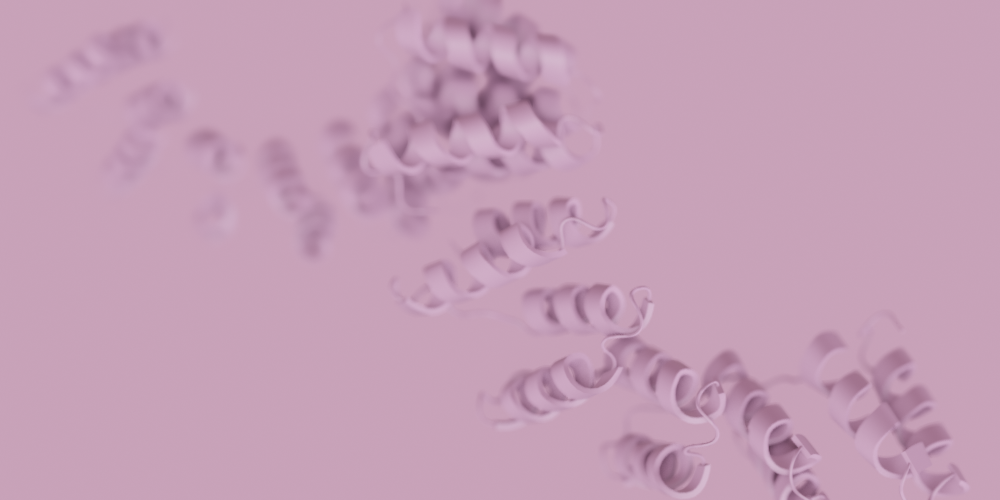

In [4]:
clear_scene()
mol = mn.load.molecule_rcsb('4ozs', build_assembly=True, starting_style="cartoon")
mol.rotation_euler = (0, 3.14 / 2, 0)
mol.select_set(True)
bpy.ops.view3d.camera_to_view_selected()
render_image()

Finsihed opening molecule after 0.43906000000000045 seconds
Adding object to scene.
Added res_id after 0.00038900000000019475 s
Added res_name after 0.004087999999999425 s
Added atomic_number after 0.0049829999999992935 s
Added b_factor after 5.600000000072214e-05 s
Added vdw_radii after 0.005095000000000738 s
Added chain_id after 0.0008569999999998856 s
Added entity_id after 0.0003690000000009519 s
Added atom_name after 0.003090999999999511 s
Added lipophobicity after 0.0051989999999992875 s
Added charge after 0.005217000000000027 s
Added is_backbone after 0.0005509999999997461 s
Added is_alpha_carbon after 0.00019300000000121997 s
Added is_solvent after 0.00019099999999916406 s
Added is_nucleic after 0.0007379999999983511 s
Added is_peptide after 0.0011060000000000514 s
Added is_hetero after 0.00016300000000057935 s
Added is_carb after 0.0007489999999990005 s
Added sec_struct after 0.0016420000000003654 s
Finsihed add object after 0.04527799999999971 seconds
Fra:1 Mem:64.38M (Peak 64

Fra:1 Mem:68.93M (Peak 79.59M) | Time:00:00.17 | Rendering 26 / 64 samples
Fra:1 Mem:68.93M (Peak 79.59M) | Time:00:00.28 | Rendering 51 / 64 samples
Fra:1 Mem:68.93M (Peak 79.59M) | Time:00:00.34 | Rendering 64 / 64 samples


Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpch8l1p98/test.png'
 Time: 00:00.38 (Saving: 00:00.03)



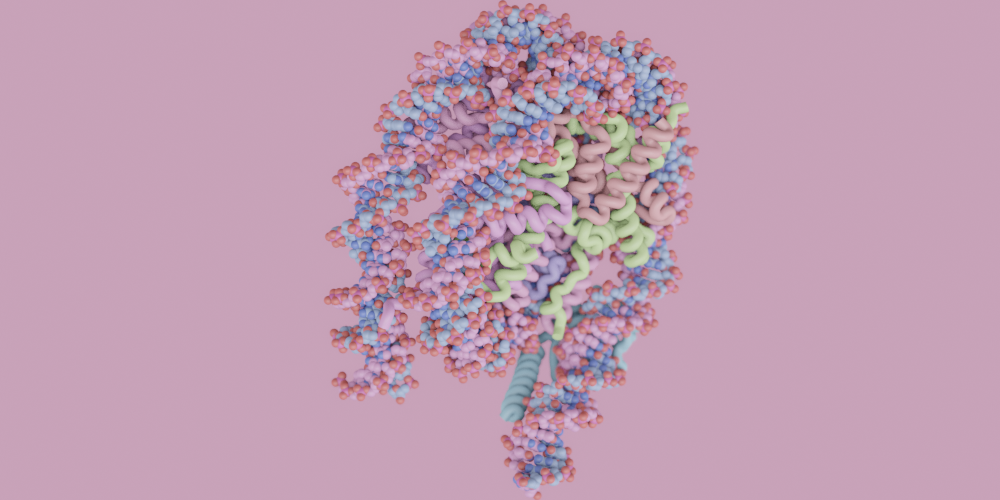

In [5]:
clear_scene()
mol = mn.load.molecule_rcsb('8HXZ', center_molecule = True, starting_style="preset_3")
orient_camera(mol)
render_image()

Fra:1 Mem:57.36M (Peak 57.36M) | Time:00:00.01 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | 8HXZ
Fra:1 Mem:60.98M (Peak 85.53M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:49.24M (Peak 85.53M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading abandoned_factory_canteen_02_1k.hdr
Fra:1 Mem:53.35M (Peak 85.53M) | Time:00:00.02 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:53.36M (Peak 85.53M) | Time:00:00.02 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:53.36M (Peak 85.53M) | Time:00:00.02 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Scene
Fra:1 Mem:53.36M (Peak 85.53M) | Time:00:00.02 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Shaders
Fra:1 Mem:53.36M (Peak 85.53M) | Time:00:00.02 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Procedurals
Fra:1 Mem:53.36M 

Fra:1 Mem:125.31M (Peak 413.28M) | Time:00:00.20 | Mem:85.41M, Peak:245.38M | Scene, ViewLayer | Updating Lights | Computing distribution
Fra:1 Mem:125.31M (Peak 413.28M) | Time:00:00.20 | Mem:85.41M, Peak:245.38M | Scene, ViewLayer | Updating Lights | Computing tree
Fra:1 Mem:125.36M (Peak 413.28M) | Time:00:00.20 | Mem:85.46M, Peak:245.38M | Scene, ViewLayer | Updating Integrator
Fra:1 Mem:126.36M (Peak 413.28M) | Time:00:00.20 | Mem:86.46M, Peak:245.38M | Scene, ViewLayer | Updating Film
Fra:1 Mem:126.37M (Peak 413.28M) | Time:00:00.20 | Mem:86.46M, Peak:245.38M | Scene, ViewLayer | Updating Lookup Tables
Fra:1 Mem:126.37M (Peak 413.28M) | Time:00:00.20 | Mem:86.46M, Peak:245.38M | Scene, ViewLayer | Updating Baking
Fra:1 Mem:126.37M (Peak 413.28M) | Time:00:00.20 | Mem:86.46M, Peak:245.38M | Scene, ViewLayer | Updating Device | Writing constant memory
Fra:1 Mem:126.47M (Peak 413.28M) | Time:00:00.20 | Mem:86.46M, Peak:245.38M | Scene, ViewLayer | Sample 0/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:00.28 | Remaining:00:19.55 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 1/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:05.02 | Remaining:00:10.59 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 80/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:05.86 | Remaining:00:09.42 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 96/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:06.73 | Remaining:00:08.38 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 112/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:07.58 | Remaining:00:07.37 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 128/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:08.42 | Remaining:00:06.38 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 144/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:09.25 | Remaining:00:05.42 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 160/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:10.08 | Remaining:00:04.48 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 176/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:10.91 | Remaining:00:03.56 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 192/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:11.73 | Remaining:00:02.65 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 208/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:12.55 | Remaining:00:01.76 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 224/256


Fra:1 Mem:162.76M (Peak 413.28M) | Time:00:13.36 | Remaining:00:00.87 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 240/256


Fra:1 Mem:178.02M (Peak 413.28M) | Time:00:14.48 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Sample 256/256
Fra:1 Mem:178.02M (Peak 413.28M) | Time:00:14.48 | Mem:122.70M, Peak:245.38M | Scene, ViewLayer | Finished
Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmp20vrztbd/test.png'
 Time: 00:14.51 (Saving: 00:00.03)



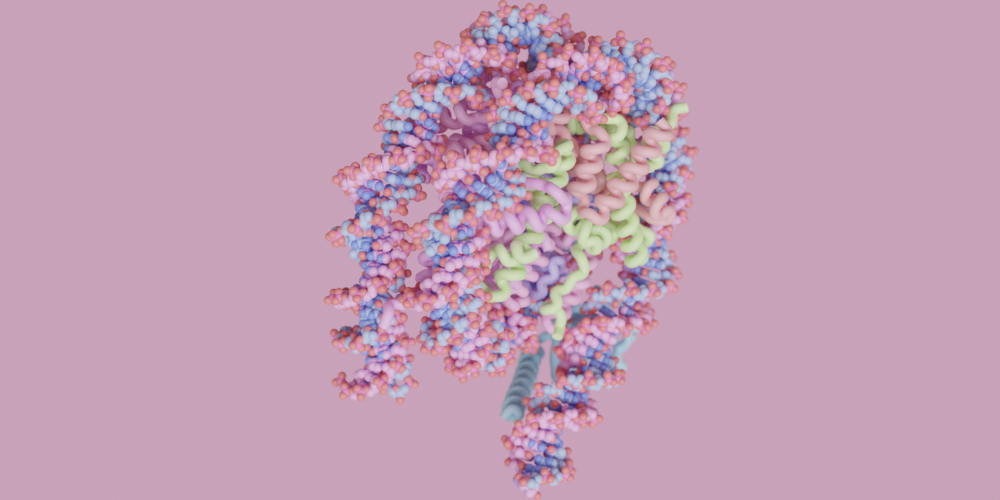

In [6]:
render_image('cycles')

Finsihed opening molecule after 1.1233819999999923 seconds
Adding object to scene.
Added res_id after 0.0009770000000060008 s
Added res_name after 0.010700999999983196 s
Added atomic_number after 0.012960999999990008 s
Added b_factor after 0.0001399999999875945 s
Added vdw_radii after 0.013283999999998741 s
Added chain_id after 0.0022139999999808424 s
Added entity_id after 0.0009560000000021773 s
Added atom_name after 0.007853000000011434 s
Added lipophobicity after 0.013504999999980782 s
Added charge after 0.013374999999996362 s
Added is_backbone after 0.0013770000000192795 s
Added is_alpha_carbon after 0.0004959999999982756 s
Added is_solvent after 0.0004870000000209984 s
Added is_nucleic after 0.002078999999980624 s
Added is_peptide after 0.00273799999999369 s
Added is_hetero after 0.0004179999999962547 s
Added is_carb after 0.0018369999999947595 s
Added sec_struct after 0.00584299999999871 s
Finsihed add object after 0.11763099999998872 seconds
Fra:1 Mem:156.63M (Peak 156.63M) | Ti

Fra:1 Mem:205.37M (Peak 218.66M) | Time:00:00.03 | Rendering 1 / 64 samples
Fra:1 Mem:164.77M (Peak 218.66M) | Time:00:00.14 | Rendering 26 / 64 samples
Fra:1 Mem:164.77M (Peak 218.66M) | Time:00:00.21 | Rendering 51 / 64 samples


Fra:1 Mem:164.83M (Peak 218.66M) | Time:00:00.24 | Rendering 64 / 64 samples
Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmprisvtehi/test.png'
 Time: 00:00.30 (Saving: 00:00.05)



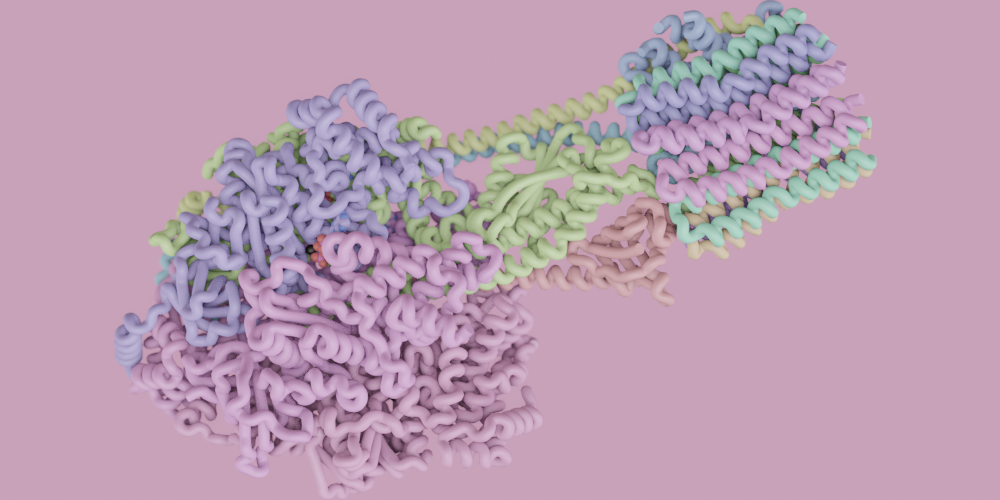

In [7]:
clear_scene()

mol = mn.load.molecule_rcsb('6N2Y', center_molecule=True, starting_style="preset_3")
mol.select_set(True)
mol.rotation_euler = (0, 90, 180)
orient_camera(mol)
render_image()

Finsihed opening molecule after 0.1895420000000172 seconds
Adding object to scene.
Added res_id after 9.399999999004649e-05 s
Added res_name after 0.0009939999999915017 s
Added atomic_number after 0.0012229999999817665 s
Added b_factor after 1.6999999985500835e-05 s
Added vdw_radii after 0.0012429999999881147 s
Added chain_id after 0.00019900000000916407 s
Added entity_id after 9.1999999995096e-05 s
Added atom_name after 0.0007379999999841402 s
Added lipophobicity after 0.0012619999999969878 s
Added charge after 0.0012529999999912889 s
Added is_backbone after 0.00015099999998824387 s
Added is_alpha_carbon after 5.300000000829641e-05 s
Added is_solvent after 5.400000000577165e-05 s
Added is_nucleic after 0.000279999999975189 s
Added is_peptide after 0.0004289999999969041 s
Added is_hetero after 4.3000000005122274e-05 s
Added is_carb after 0.00028100000000108594 s
Added sec_struct after 0.0005590000000097461 s
Finsihed add object after 0.011689999999987322 seconds
Fra:1 Mem:42.31M (Peak 

Fra:1 Mem:120.77M (Peak 408.74M) | Time:00:00.19 | Mem:86.22M, Peak:246.18M | Scene, ViewLayer | Updating Lights | Computing distribution
Fra:1 Mem:120.77M (Peak 408.74M) | Time:00:00.19 | Mem:86.22M, Peak:246.18M | Scene, ViewLayer | Updating Lights | Computing tree
Fra:1 Mem:120.77M (Peak 408.74M) | Time:00:00.19 | Mem:86.22M, Peak:246.18M | Scene, ViewLayer | Updating Integrator
Fra:1 Mem:121.77M (Peak 408.74M) | Time:00:00.19 | Mem:87.22M, Peak:246.18M | Scene, ViewLayer | Updating Film
Fra:1 Mem:121.77M (Peak 408.74M) | Time:00:00.19 | Mem:87.22M, Peak:246.18M | Scene, ViewLayer | Updating Lookup Tables
Fra:1 Mem:121.77M (Peak 408.74M) | Time:00:00.19 | Mem:87.22M, Peak:246.18M | Scene, ViewLayer | Updating Baking
Fra:1 Mem:121.77M (Peak 408.74M) | Time:00:00.19 | Mem:87.22M, Peak:246.18M | Scene, ViewLayer | Updating Device | Writing constant memory
Fra:1 Mem:121.78M (Peak 408.74M) | Time:00:00.19 | Mem:87.22M, Peak:246.18M | Scene, ViewLayer | Sample 0/256
Fra:1 Mem:158.07M (Pea

Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:07.53 | Remaining:00:16.14 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 80/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:08.97 | Remaining:00:14.64 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 96/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:10.40 | Remaining:00:13.12 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 112/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:11.78 | Remaining:00:11.59 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 128/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:13.17 | Remaining:00:10.09 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 144/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:14.56 | Remaining:00:08.62 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 160/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:15.94 | Remaining:00:07.15 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 176/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:17.34 | Remaining:00:05.71 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 192/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:18.72 | Remaining:00:04.27 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 208/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:20.08 | Remaining:00:02.84 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 224/256


Fra:1 Mem:158.07M (Peak 408.74M) | Time:00:21.43 | Remaining:00:01.41 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 240/256


Fra:1 Mem:173.32M (Peak 408.74M) | Time:00:23.05 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Sample 256/256
Fra:1 Mem:173.32M (Peak 408.74M) | Time:00:23.05 | Mem:123.46M, Peak:246.18M | Scene, ViewLayer | Finished
Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpbq4s3mcs/test.png'
 Time: 00:23.09 (Saving: 00:00.03)



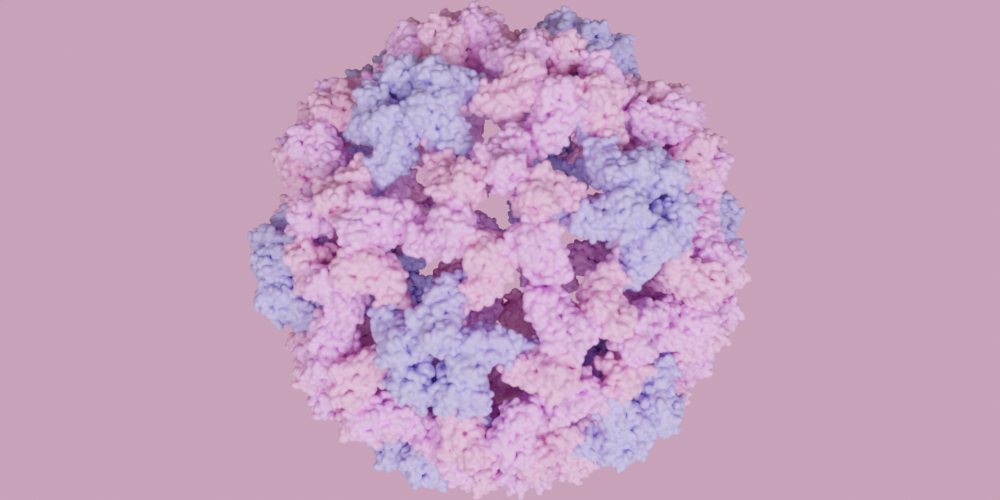

In [8]:
clear_scene()
mol = mn.load.molecule_rcsb('8CPY', build_assembly=True, starting_style="surface")
orient_camera(mol)
render_image('cycles')